# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
api_key ="ba01d29f51e9ee2039e1fbd74ceae254"
api_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data =[]
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
for i, city in enumerate (cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = api_url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()
       # Parse out the max temp, humidity, and cloudiness
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]
       city_data.append({"City": city,
                     "Lat": city_lat,
                     "Lng": city_lng,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed": city_wind,
                     "Country": city_country,
                     "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | samusu
City not found. Skipping...
Processing Record 3 of Set 1 | kieta
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | gilazi
City not found. Skipping...
Processing Record 16 of Set 1 | ossora
Processing Record 17 of Set 1 | nakhon phanom
Processing Record 18 of Set 1 | bargal
City not found. Skipping...
Processing Record 19 of Set 1 |

Processing Record 32 of Set 4 | grand gaube
Processing Record 33 of Set 4 | gazli
Processing Record 34 of Set 4 | aksu
Processing Record 35 of Set 4 | fengcheng
Processing Record 36 of Set 4 | norman wells
Processing Record 37 of Set 4 | bambanglipuro
Processing Record 38 of Set 4 | felipe carrillo puerto
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | hammerfest
Processing Record 41 of Set 4 | inongo
Processing Record 42 of Set 4 | gisborne
Processing Record 43 of Set 4 | santiago del estero
Processing Record 44 of Set 4 | beaupre
Processing Record 45 of Set 4 | mairi
Processing Record 46 of Set 4 | ucluelet
Processing Record 47 of Set 4 | stoyba
City not found. Skipping...
Processing Record 48 of Set 4 | palma di montechiaro
Processing Record 49 of Set 4 | pervomayskiy
Processing Record 0 of Set 5 | vaini
Processing Record 1 of Set 5 | merauke
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | rapid valley
Processing Record 4 of Set 

Processing Record 20 of Set 8 | gerash
Processing Record 21 of Set 8 | kaduna
Processing Record 22 of Set 8 | dezful
Processing Record 23 of Set 8 | tocache
Processing Record 24 of Set 8 | talnakh
Processing Record 25 of Set 8 | necochea
Processing Record 26 of Set 8 | cap malheureux
Processing Record 27 of Set 8 | moose factory
Processing Record 28 of Set 8 | marsa matruh
Processing Record 29 of Set 8 | paranga
Processing Record 30 of Set 8 | olonets
Processing Record 31 of Set 8 | upernavik
Processing Record 32 of Set 8 | alta floresta
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | timra
Processing Record 35 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | fergus falls
Processing Record 38 of Set 8 | slave lake
Processing Record 39 of Set 8 | saint george
Processing Record 40 of Set 8 | barentu
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | tadine
Pro

Processing Record 4 of Set 12 | barra do garcas
Processing Record 5 of Set 12 | rantepao
Processing Record 6 of Set 12 | besancon
Processing Record 7 of Set 12 | livramento
Processing Record 8 of Set 12 | tacoronte
Processing Record 9 of Set 12 | stara ves nad ondrejnici
Processing Record 10 of Set 12 | niquelandia
Processing Record 11 of Set 12 | bowen
Processing Record 12 of Set 12 | mwinilunga
Processing Record 13 of Set 12 | lokosovo
Processing Record 14 of Set 12 | richards bay
Processing Record 15 of Set 12 | morondava
Processing Record 16 of Set 12 | kletnya
Processing Record 17 of Set 12 | la venta del astillero
Processing Record 18 of Set 12 | coos bay
Processing Record 19 of Set 12 | opuwo
Processing Record 20 of Set 12 | betioky
City not found. Skipping...
Processing Record 21 of Set 12 | brewster
Processing Record 22 of Set 12 | nuevo laredo
Processing Record 23 of Set 12 | chippewa falls
Processing Record 24 of Set 12 | ayios matthaios
City not found. Skipping...
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
api_key ="ba01d29f51e9ee2039e1fbd74ceae254"
api_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 0
record_counter = 0
setcount = 1

for city in cities:

    city_url = api_url + "&q=" + city
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print("---------------------------------------")
        print("We've made it to set " + str(setcount) + ".")
        print("We'll reset the record counter to " + str(record_counter) + ".")
        print("So far, we have " + str(counter) + " total records.")
        print("---------------------------------------")
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(city_url).json()
        #pprint(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City not found: " + city)
print(len(weather_response))

processing Record 1 of Set 1 | amderma
City not found: amderma
processing Record 2 of Set 1 | samusu
City not found: samusu
processing Record 3 of Set 1 | kieta
processing Record 4 of Set 1 | illoqqortoormiut
City not found: illoqqortoormiut
processing Record 5 of Set 1 | mys shmidta
City not found: mys shmidta
processing Record 6 of Set 1 | saint-philippe
processing Record 7 of Set 1 | tiksi
processing Record 8 of Set 1 | dingle
processing Record 9 of Set 1 | klaksvik
processing Record 10 of Set 1 | isangel
processing Record 11 of Set 1 | atuona
processing Record 12 of Set 1 | arraial do cabo
processing Record 13 of Set 1 | ushuaia
processing Record 14 of Set 1 | ponta do sol
processing Record 15 of Set 1 | gilazi
City not found: gilazi
processing Record 16 of Set 1 | ossora
processing Record 17 of Set 1 | nakhon phanom
processing Record 18 of Set 1 | bargal
City not found: bargal
processing Record 19 of Set 1 | cape town
processing Record 20 of Set 1 | tuktoyaktuk
processing Record 2

processing Record 29 of Set 4 | virginia beach
processing Record 30 of Set 4 | puerto ayora
processing Record 31 of Set 4 | rungata
City not found: rungata
processing Record 32 of Set 4 | vaitupu
City not found: vaitupu
processing Record 33 of Set 4 | airai
processing Record 34 of Set 4 | grand gaube
processing Record 35 of Set 4 | gazli
processing Record 36 of Set 4 | aksu
processing Record 37 of Set 4 | fengcheng
processing Record 38 of Set 4 | norman wells
processing Record 39 of Set 4 | bambanglipuro
processing Record 40 of Set 4 | felipe carrillo puerto
processing Record 41 of Set 4 | port alfred
processing Record 42 of Set 4 | hammerfest
processing Record 43 of Set 4 | inongo
processing Record 44 of Set 4 | gisborne
processing Record 45 of Set 4 | santiago del estero
processing Record 46 of Set 4 | beaupre
processing Record 47 of Set 4 | mairi
processing Record 48 of Set 4 | ucluelet
processing Record 49 of Set 4 | stoyba
City not found: stoyba
processing Record 50 of Set 4 | pal

---------------------------------------
We've made it to set 8.
We'll reset the record counter to 0.
So far, we have 350 total records.
---------------------------------------
processing Record 1 of Set 8 | clyde river
processing Record 2 of Set 8 | harnosand
processing Record 3 of Set 8 | nakasongola
processing Record 4 of Set 8 | ketchikan
processing Record 5 of Set 8 | constitucion
processing Record 6 of Set 8 | dicabisagan
processing Record 7 of Set 8 | buluang
processing Record 8 of Set 8 | hami
processing Record 9 of Set 8 | sabzevar
processing Record 10 of Set 8 | navalmoral de la mata
processing Record 11 of Set 8 | umea
processing Record 12 of Set 8 | pevek
processing Record 13 of Set 8 | jalu
processing Record 14 of Set 8 | saint-louis
processing Record 15 of Set 8 | sipe sipe
processing Record 16 of Set 8 | chapais
processing Record 17 of Set 8 | turukhansk
processing Record 18 of Set 8 | bumba
processing Record 19 of Set 8 | palana
processing Record 20 of Set 8 | victoria
p

processing Record 25 of Set 11 | gamboma
processing Record 26 of Set 11 | aklavik
processing Record 27 of Set 11 | autazes
processing Record 28 of Set 11 | tarko-sale
processing Record 29 of Set 11 | gold coast
processing Record 30 of Set 11 | acajutla
processing Record 31 of Set 11 | moindou
processing Record 32 of Set 11 | khonuu
City not found: khonuu
processing Record 33 of Set 11 | hagere selam
processing Record 34 of Set 11 | seybaplaya
processing Record 35 of Set 11 | manoel urbano
processing Record 36 of Set 11 | vawkavysk
processing Record 37 of Set 11 | cabo san lucas
processing Record 38 of Set 11 | acapulco
processing Record 39 of Set 11 | saleaula
City not found: saleaula
processing Record 40 of Set 11 | emba
processing Record 41 of Set 11 | ust-nera
processing Record 42 of Set 11 | batticaloa
processing Record 43 of Set 11 | fort nelson
processing Record 44 of Set 11 | mumford
processing Record 45 of Set 11 | palestrina
processing Record 46 of Set 11 | caravelas
processin

In [18]:
#Length of list
print(len(city_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(windspeed_list))

541
541
541
541
541
541
541


In [19]:
weather_dict={"city":city_list,
                "lat":lat_list,
                "lng":lng_list,
                "max_temp":max_temp_list,
                "humidity":humidity_list,
                "cloudiness":cloudiness_list,
                "windspeed":windspeed_list}
weather_df=pd.DataFrame(weather_dict)
weather_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
0,Kieta,-6.22,155.63,85.17,71,100,4.97
1,Saint-Philippe,45.36,-73.48,30.20,92,90,3.36
2,Tiksi,71.64,128.87,-21.08,88,66,9.24
3,Dingle,11.00,122.67,80.13,82,41,15.90
4,Klaksvik,62.23,-6.59,46.40,93,100,3.36


In [20]:
weather_df.to_csv("cities.csv",index=False)

In [21]:
weather_df["lat"]

0      -6.22
1      45.36
2      71.64
3      11.00
4      62.23
       ...  
536    -7.53
537    69.30
538    33.37
539    32.07
540    59.65
Name: lat, Length: 541, dtype: float64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

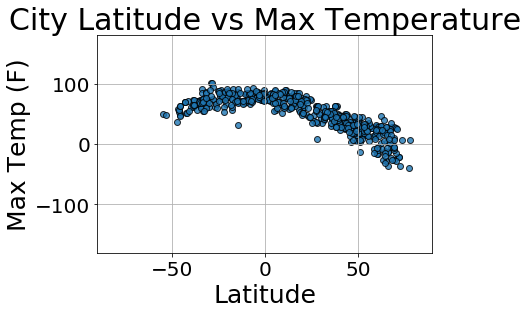

In [22]:
plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title('City Latitude vs Max Temperature', fontsize =30)
plt.ylabel('Max Temp (F)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
#plt.show()
plt.savefig('latitute_Temperature.png')

#### Latitude vs. Humidity Plot

In [ ]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title('Latitude vs Humidity', fontsize =30)
plt.ylabel('Humidity (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
#plt.show()
plt.savefig('latitute_humidity.png')

#### Latitude vs. Cloudiness Plot

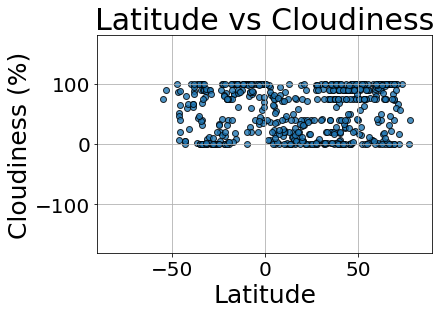

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title('Latitude vs Cloudiness', fontsize =30)
plt.ylabel('Cloudiness (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitute_cloudiness.png')

#### Latitude vs. Wind Speed Plot

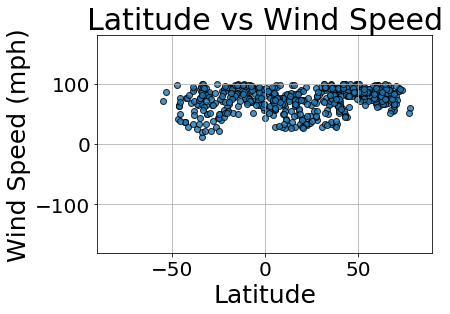

In [24]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title('Latitude vs Wind Speed Plot', fontsize =30)
plt.title('Latitude vs Wind Speed', fontsize =30)
plt.ylabel('Wind Speed (mph)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
#plt.show()
plt.savefig('latitute_windspeed.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames
SouthernHem = weather_df[(weather_df['Lat'] < 0) ]

SouthernHem.head()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression